- 先ずは変数毎の正規化を入れないとおかしくないですか？
- 
# pickleに吐いて，可視化
- 誤差が下がるようす
- エピソード毎の報酬の経過

In [1]:
ll

total 1393164
-rw-r--r-- 1 shigeharu    19258 Dec  5 17:34 base_line_dqn.py
-rw-r--r-- 1 shigeharu     4544 Dec  5 17:34 baseline.py
-rw-r--r-- 1 shigeharu      995 Dec  5 21:28 base_rec00_1000_std10_loop20.pickle
-rw-r--r-- 1 shigeharu      995 Dec  5 21:18 base_rec00_100_std10_loop20.pickle
-rw-r--r-- 1 shigeharu      185 Dec  5 17:34 base_rec00_10_std10_loop20.pickle
-rw-r--r-- 1 shigeharu      995 Dec  5 21:29 base_rec00_1100_std10_loop20.pickle
-rw-r--r-- 1 shigeharu      995 Dec  5 21:31 base_rec00_1200_std10_loop20.pickle
-rw-r--r-- 1 shigeharu      995 Dec  5 21:32 base_rec00_1300_std10_loop20.pickle
-rw-r--r-- 1 shigeharu      995 Dec  5 21:33 base_rec00_1400_std10_loop20.pickle
-rw-r--r-- 1 shigeharu      995 Dec  5 21:35 base_rec00_1500_std10_loop20.pickle
-rw-r--r-- 1 shigeharu      995 Dec  5 21:36 base_rec00_1600_std10_loop20.pickle
-rw-r--r-- 1 shigeharu      995 Dec  5 21:37 base_rec00_1700_std10_loop20.pickle
-rw-r--r-- 1 shigeharu      995 Dec  5 21:39 base_rec00_1800

In [1]:
import glob
all_names = glob.glob('gate_rec01_*std10_loop20.pickle')

In [2]:
import glob
all_names = glob.glob('gate_rec01_*std10_loop20.pickle')
import pickle
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [5]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [3]:
import math
def draw_int_rew(data,i,gate=False):
    plt.figure(figsize=(6, 5),facecolor="gray")
    x = [math.sin(rad) for rad in data['target'][i]]
    y = [math.cos(rad) for rad in data['target'][i]]
    losses = [d[0] for d in data['target_losses'][i]]
        
    plt.rcParams["axes.facecolor"] = (1,1,1,0)
    plt.xlim(-1.1, 1.1)
    plt.ylim(-1.1,1.1)
    plt.scatter(x,y,s=5,cmap='magma',c=losses)
    if gate:
        x = [math.sin(rad)*0.8 for rad in data['target'][i]]
        y = [math.cos(rad)*0.8 for rad in data['target'][i]]
        losses = [d[0] for d in data['target_a_losses'][i]]
        plt.scatter(x,y,s=5,cmap='magma',c=losses)
    plt.colorbar()

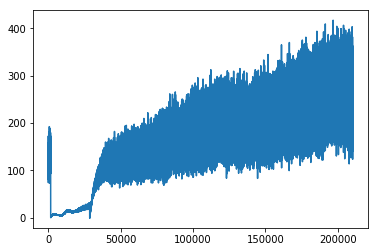

In [21]:
data = []
for an in all_names:
    with open(an,mode='rb') as f:
        data += pickle.load(f)["qt+i_r"]
plt.plot(list(range(len(data))), [float(sum(d.array)/len(d.array)) for d in data])

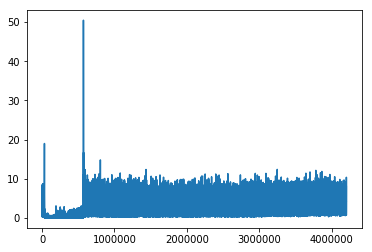

In [23]:
data = []
for an in all_names:
    with open(an,mode='rb') as f:
        data += [d for i, d in enumerate(pickle.load(f)['loss']) if i%10==0]
plt.plot(list(range(len(data))), [float(d.array) for d in data])

In [ ]:
data = []
for an in all_names:
    with open(an,mode='rb') as f:
        data += [d for i, d in enumerate(pickle.load(f)["qt+i_r"]) if i%10==0]
plt.plot(list(range(len(data))), data)

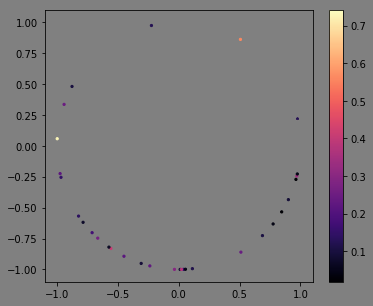

In [52]:
draw_int_rew(data,len(data['target_losses'])-1)

In [41]:
glob.glob('gate_rec01_*')

['gate_rec01_std10_loop20.pickle',
 'gate_rec01_10_std10_loop20.pickle',
 'gate_rec01_20_std10_loop20.pickle',
 'gate_rec01_30_std10_loop20.pickle',
 'gate_rec01_40_std10_loop20.pickle',
 'gate_rec01_50_std10_loop20.pickle',
 'gate_rec01_60_std10_loop20.pickle',
 'gate_rec01_70_std10_loop20.pickle',
 'gate_rec01_80_std10_loop20.pickle',
 'gate_rec01_90_std10_loop20.pickle',
 'gate_rec01_100_std10_loop20.pickle',
 'gate_rec01_110_std10_loop20.pickle',
 'gate_rec01_120_std10_loop20.pickle',
 'gate_rec01_130_std10_loop20.pickle',
 'gate_rec01_140_std10_loop20.pickle',
 'gate_rec01_150_std10_loop20.pickle',
 'gate_rec01_160_std10_loop20.pickle',
 'gate_rec01_170_std10_loop20.pickle',
 'gate_rec01_180_std10_loop20.pickle',
 'gate_rec01_190_std10_loop20.pickle',
 'gate_rec01_200_std10_loop20.pickle',
 'gate_rec01_210_std10_loop20.pickle',
 'gate_rec01_220_std10_loop20.pickle',
 'gate_rec01_230_std10_loop20.pickle',
 'gate_rec01_240_std10_loop20.pickle',
 'gate_rec01_250_std10_loop20.pickle',

In [42]:
# 07 は普通の好奇心，ノイズなし

In [56]:
glob.glob('logs/gate_rec02_*')

['logs/gate_rec02_100_std10_loop1.pickle']

In [58]:
import glob
all_names = glob.glob('logs/gate_rec02_*')
import pickle
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [59]:
data = {"qt+i_r":[],
       'reward':[],
       "loss":[],
       "loss_a":[]}
for j,an in enumerate(all_names):
    print(j,len(all_names))
    with open(an,mode='rb') as f:
        tmp = pickle.load(f)
        data["qt+i_r"] += [d for i, d in enumerate(tmp["qt+i_r"]) if i%100==0]
        data['reward'] += [d for i, d in enumerate(tmp['reward'])]
        data["loss"] += [d for i, d in enumerate(tmp["loss"]) if i%100==0]
        data["loss_a"] += [d for i, d in enumerate(tmp["loss_a"]) if i%100==0]

0 1


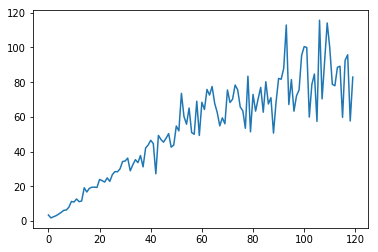

In [60]:
plt.plot(list(range(len(data["qt+i_r"]))), [float(sum(d.array)/len(d.array)) for d in data["qt+i_r"]])

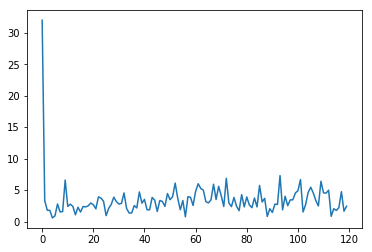

In [61]:
plt.plot(list(range(len(data["loss"]))), [float(d.array) for d in data["loss"]])

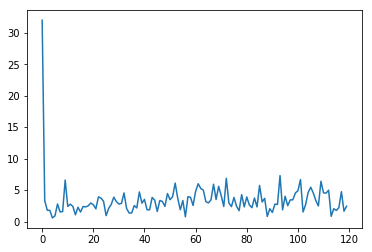

In [62]:
plt.plot(list(range(len(data["loss_a"]))), [float(d.array) for d in data["loss_a"]])

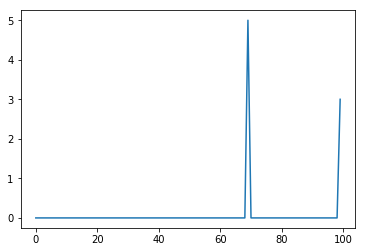

In [63]:
plt.plot(list(range(len(data['reward']))), data['reward'])

In [64]:
len(all_names)

1

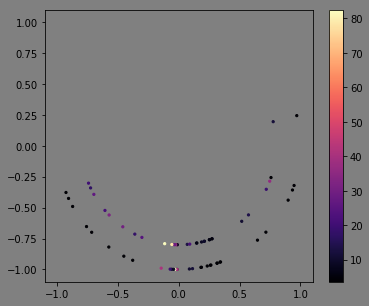

In [75]:
num = 0
with open(all_names[num],mode='rb') as f:
    data = pickle.load(f)
draw_int_rew(data,len(data['target_losses'])-1,gate=True)

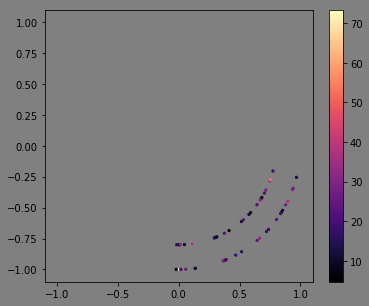

In [76]:
draw_int_rew(data,1,gate=True)

In [23]:
with open(all_names[0],mode='rb') as f:
    data = pickle.load(f)

In [10]:
data.keys()

dict_keys(['target_losses', 'reward', 'loss_a', 'qt+i_r', 'loss', 'target', 'target_a_losses'])

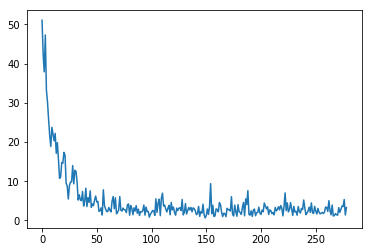

In [49]:
plt.plot(list(range(len(data["loss"])))[:1000], [float(d.array) for d in data["loss"]][:1000])